In [23]:

import numpy as np
import pandas as pd
import cufflinks as cf


cf.set_config_file(sharing='public', theme='ggplot', offline=True)

In [24]:
det = pd.read_csv('F:\PyCharm\Data Analytics\Sports\Teams.csv')

df = det[det['franchID'] == 'DET']

In [25]:
df.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
152,1926,NHL,DTC,DET,NaN,AM,5,NaN,44,12,...,105,Detroit Cougars,419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,1927,NHL,DTC,DET,NaN,AM,4,NaN,44,19,...,79,Detroit Cougars,395.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,1928,NHL,DTC,DET,NaN,AM,3,QF,44,19,...,63,Detroit Cougars,381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,1929,NHL,DTC,DET,NaN,AM,4,NaN,44,14,...,133,Detroit Cougars,473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,1930,NHL,DTF,DET,NaN,AM,4,NaN,44,16,...,105,Detroit Falcons,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 152 to 1498
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        85 non-null     int64  
 1   lgID        85 non-null     object 
 2   tmID        85 non-null     object 
 3   franchID    85 non-null     object 
 4   confID      37 non-null     object 
 5   divID       56 non-null     object 
 6   rank        85 non-null     int64  
 7   playoff     60 non-null     object 
 8   G           85 non-null     int64  
 9   W           85 non-null     int64  
 10  L           85 non-null     int64  
 11  T           78 non-null     float64
 12  OTL         12 non-null     float64
 13  Pts         85 non-null     int64  
 14  SoW         7 non-null      float64
 15  SoL         7 non-null      float64
 16  GF          85 non-null     int64  
 17  GA          85 non-null     int64  
 18  name        85 non-null     object 
 19  PIM         85 non-null    

In [27]:
df2 = df[df.franchID.str.contains('DET',case=False).replace('null', np.nan).dropna()]

In [28]:
df2['GF'].value_counts(ascending=False).to_frame('count')

,count
252,3
255,2
229,2
183,2
313,2
...,...
190,1
320,1
322,1
257,1


In [29]:
# F-Finals
# SC - Stanley Cup Champs
# SF - Stanley Cup Finals
# CF - Conference Finals
# CSF - Conference Semi-Finals
# CQF - Conference Quarter-Finals
# QF - Quarter Finals
# DF - Division Finals
# DSF - Division Semi-Finals


df2['playoff'].value_counts(ascending=False).to_frame('count')

,count
F,13
SF,12
SC,11
CSF,5
CQF,5
DSF,5
QF,4
CF,4
DF,1


In [30]:
df2['Pts'].describe()

count     85.000000
mean      74.364706
std       24.052446
min       28.000000
25%       58.000000
50%       70.000000
75%       94.000000
max      131.000000
Name: Pts, dtype: float64

In [31]:
df2['W'].describe()


count    85.000000
mean     31.894118
std      11.607698
min      12.000000
25%      23.000000
50%      30.000000
75%      41.000000
max      62.000000
Name: W, dtype: float64

In [32]:
df2['L'].describe()

count    85.000000
mean     26.870588
std      10.335777
min      11.000000
25%      19.000000
50%      25.000000
75%      34.000000
max      57.000000
Name: L, dtype: float64

In [33]:
df2['year'].describe()

count      85.000000
mean     1968.082353
std        24.814172
min      1926.000000
25%      1947.000000
50%      1968.000000
75%      1989.000000
max      2011.000000
Name: year, dtype: float64

In [34]:
df2[['W', 'year']].iplot(kind='scatter', x ='year')

In [35]:
df2[['W','L','OTL', 'year']].iplot(kind='scatter', x='year')

In [36]:
df2[['GF','GA', 'year']].iplot(kind='scatter', x='year')

In [37]:
df2[['GF','GA', 'W', 'L', 'year']].iplot(kind='scatter', x='year')


In [38]:
df2[['GF','GA', 'W', 'L', 'Pts', 'year']].iplot(kind='scatter', x='year')

In [39]:
df2[['PIM', 'BenchMinor', 'year']].iplot(kind='scatter', x='year')

In [40]:
# F-Finals
# SC - Stanley Cup Champs
# SF - Stanley Cup Finals
# CF - Conference Finals
# CSF - Conference Semi-Finals
# CQF - Conference Quarter-Finals
# QF - Quarter Finals
# DF - Division Finals
# DSF - Division Semi-Finals



df2.playoff.replace({"F":"First Round",
                  "SC":"Stanley Cup Champions",
                  "SF": "Stanley Cup Finals",
                  "CF": "Conference Finals",
                  "CSF": "Conference Semi-Finals",
                  "CQF": "Conference Quarter-Finals",
                  "QF": "Quarter Finals",
                  "DF": "Divison Finals",
                  "DSF": "Division Semi-Finals"
                },inplace=True)

<AxesSubplot:ylabel='Playoff Rounds'>

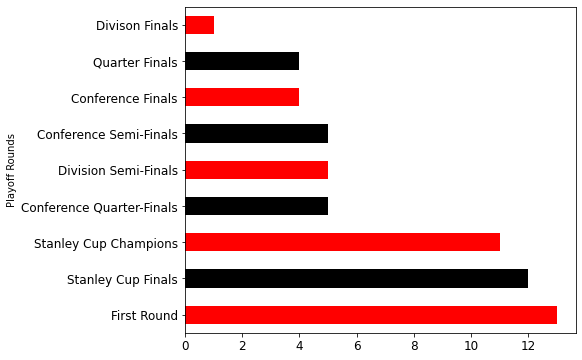

In [41]:
my_colors = ['r', 'k']*5

df2['playoff'].value_counts().plot(
    figsize=(7, 6), rot=0,
    kind='barh',
    xlabel=('Playoff Rounds'),
    color=my_colors,
    fontsize=12,
    )